# The Battle of Neighborhoods
## Homestyle Japanese Restaurant in New York

## Introduction
New York city is major of cultural, financial, commercial centers in the world.  The population of New York city is 8 million and it is most density population.  The city has as-you-desired choice of restaurants.  One of my clients ask to open a Japanese restaurant in New York city.  This client plans to open a homestyle Japanese restaurant, unlike generic of Sushi restaurants, the homestyle restaurants are relatively reasonable.  It is a niche market analysis that explore existing Japanese restaurants in New York city and what are the current trends.  Among the current popularity of existing Japanese restaurants, we are going to recommend the best location to open the Homestyle Japanese restaurant.   

## Data
Initial analysis involves current household economic status data in the United States which is retrieved from NYCdata (https://www.baruch.cuny.edu/nycdata/population-geography/avg_size_hhold.htm) and United States Census Bureau (https://www.census.gov/) in order to examine a correlation between Persons per household and Average annual expenditures in New York City.  Also median household income is retrieved from United States Census Bureau.
New York city data is obtained from URL  'https://cocl.us/new_york_dataset' which has neighborhood latitude and longitude.    Venue and the detail information are retrieved from Foursquare using unique credentials.  

## Methodology

According to the National Center for Biotechnology Information (https://pubmed.ncbi.nlm.nih.gov/6667739/), family size affects the patterns of spending and income levels and spending increases as the number of children increases.  The initial analysis is to get a big picture of household economics in relative to the number of household and the expenditure in the major metropolitan cities in the United States.  
The purpose of this analysis to understand what type of household tends to spend more on food for their daily life.  In this analysis, linear regression imported from scipy to run a correlation analysis.  The regression displays a correlation between person per household and average annual expenditures.  
In the second analysis, similarly to the first, we will look into a dataset which elaborates household economic factors in New York city.  We will see median income and person per household in this analysis.
Now, we are getting into a phase of core analysis to identify which locations are the candidate for opening homestyle Japanese restaurants in New York city.  We will get latitude and longitude of New York city.  Then, we will visualize the borough and the neighborhood with the latitude and longitude using folium map.
With Foresquare credentials, we retrieve venues information.  Then we will look into a venue which category is Japanese Restaurants.  We will explore numbers of Japanese restaurants in New York city.  Then venue details from Foresquare has information such as rating which can indicate popularity of the Japanese restaurants.  We will extract Japanese restaurant only above average rate of seven.  Finally, we will run KMean cluster the high rating Japanese restaurants in the neighborhood.  The neighborhood in clusters will be displayed in a map for result.

# Results

As we examine in the initial analysis of linear regression between average annual expenditure and persons per household for US metropolitan cities shows significant correlation of R square 0.78.  This means there are more people in one household they spend more including food.

When we dive into the similar household statistics for New York city, income for Bronx is fairly low compared to other four boroughs.  Number of persons per household shows Manhattan is the lowest.  This analysis may indicate higher possibility of candidates of opening homestyle Japanese restaurants in three boroughs of Queens, Brooklyn, and Staten Island.

For the core analysis, we extract rating above seven among Japanese restaurants in New York city.  The first obvious result is Bronx is eliminated as the neighborhood do not have any high rating Japanese restaurants.  The greatest number of Japanese restaurants are in Brookelyn and Manhattan, then Quees is the third and Staten Island only has a few in the neighborhood.  Average rating for Japanese restaurants also shows the same order as Queens and Staten Island are close each other.  
As clusters are created for high rating Japanese restaurants in New York city, the scatter plot shows the spread among the four boroughs.  The clusters are translated in the folio map.

## Discussion

From the overview of US metropolitan city analysis, we estimated Brooklyn, Queens and Staten Island could be good candidate for opening the homestyle Japanese restaurant.   Unlike relatively high value Sushi restaurants, the homestyle Japanese restaurant targets the middle-income neighborhood market.  The target market has larger number of persons in a household may spend more on food.  
Foresquare information provides insights of current Japanese restaurants trend.  Brooklyn looks like to have the greatest number and highest rating of Japanese restaurants in New York city.  Queens has less number and rating among top boroughs and Staten Island has only a few high rating Japanese restaurants.  With this result, we would recommend to open a homestyle Japanese restaurants in Queens.  Brooklyn seems to have a high competition with existing Japanese restaurants; however, Queens may have high potentials to establish a new restaurant in less competitive environment and target household economic neighborhood.  

## Conclusion

US household economic and demographic statistics shows that there is a significant correlation between persons per household and annual average household expenditures.  Manhattan and Bronx have identified as outliers in this analysis.  It leaves Brooklyn, Queens, and Staten Island are the possible candidates for opening a homestyle Japanese restaurants.  
Studying high rating Japanese restaurants using Foresquare results in Brookelyn has the most numbers and highest rating Japanese restaurants in New York city.  However, a new homestyle Japanese restaurants target neighborhood is middle-income and more people in a household neighborhood.  Also, current competition should be incorporated in the selection factor.  Thus, we recommend Queens borough as the first recommendation for opening the Japanese restaurants in New York city.  The borough has average income among five borough and persons per household is the greatest.  The neighborhoods have several high rating Japanese restaurants, however we speculate there is a high potential for a new restaurants in the environment.  

Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.



usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


Import data of persons per household and average annual expenditures in metropolitan cities in the United States

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline


ny_ex_hh = pd.read_csv(r'C:\Users\sachi\Desktop\Coursera_Capstone\Expenditure_vs_Household.csv')
ny_ex_hh

,City,Persons_per_household,Average_annual_expenditures
0,Atlanta,2.19,64103
1,Boston,2.36,68119
2,Chicago,2.48,64804
3,Houston,2.65,75288
4,New York,2.60,73806
5,San Diego,2.70,77451


Import scipy and seaborn to display regression analysis for persons per household and average annual expenditures in metropolitan cities in the United States.

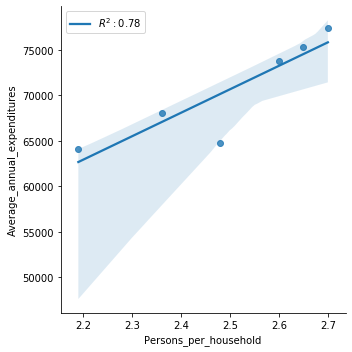

In [3]:
from scipy import stats

p = sns.lmplot(x='Persons_per_household', y='Average_annual_expenditures',
        data=ny_ex_hh,
        line_kws={'label':"Linear Reg"}, legend=True)
ax = p.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
slope, intercept, r_value, p_value, std_err = stats.linregress(ny_ex_hh['Persons_per_household'],ny_ex_hh['Average_annual_expenditures'])
label_line_1 = r'$y={0:.1f}x+{1:.1f}'.format(slope,intercept)
label_line_2 = r'$R^2:{0:.2f}$'.format(0.78) 
L_labels[0].set_text(label_line_1)
L_labels[0].set_text(label_line_2)

Import New York City household economic and demographic factors

In [10]:
ny_stats = pd.read_csv(r'C:\Users\sachi\Desktop\Coursera_Capstone\NYC_stats.csv')
ny_stats

,Borough,Person_per_household,Number_of_household,Asian_percentage,Median_household_income
0,Manhattan,2.07,759460,13%,86553
1,Bronx,2.76,503829,5%,40088
2,Queens,2.90,778932,27%,68666
3,Brooklyn,2.66,958567,13%,60231
4,Staten Island,2.82,166246,11%,82783


Look into median household income by borough in New York City in dataframe

In [5]:
median_hh_income = ny_stats.iloc[:,[0,4]]
median_hh_income

,Borough,Median_household_income
0,Manhattan,86553
1,Bronx,40088
2,Queens,68666
3,Brooklyn,60231
4,Staten Island,82783


Display median household income by borough in New York City in seaborn barplot

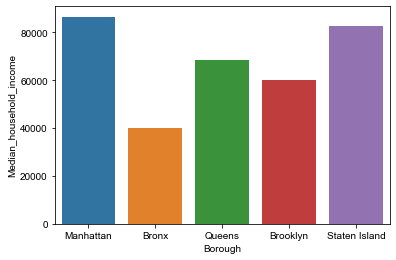

In [6]:
sns.barplot(x = 'Borough',
            y = 'Median_household_income',
            data = ny_stats)
sns.set(style="whitegrid", font_scale=1.0)
plt.show()

Look into person per household by borough in New York City in dataframe

In [7]:
Person_per_hh = ny_stats.iloc[:,[0,1]]
Person_per_hh

,Borough,Person_per_household
0,Manhattan,2.07
1,Bronx,2.76
2,Queens,2.90
3,Brooklyn,2.66
4,Staten Island,2.82


Display person per household by borough in New York City in seaborn barplot

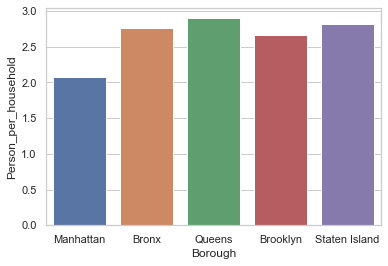

In [8]:
sns.barplot(x = 'Borough',
            y = 'Person_per_household',
            data = ny_stats)
sns.set(style="whitegrid", font_scale=1.0)
plt.show()

Get new york data with latitude and longtitude

In [11]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    features=resp['features']
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

Look at the imported data in dataframe

In [12]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Dataframe has 306 rows and 4 columns

In [14]:
ny_data.shape

(306, 4)

Install folium and geopy in order to create map and identify locations.  Also import maplotlib and sklearn cluster library

In [15]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium 
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



Get the geographical coordinate of NY city

In [18]:
address = "New York, NY"

geolocator = Nominatim(user_agent="ny_data")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of NY city are {}, {}.'.format(latitude, longitude))

The geographical coordinate of NY city are 40.7127281, -74.0060152.


Create a map of New York City

In [19]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_data['Latitude'], ny_data['Longitude'], ny_data['Borough'], ny_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Get unique IDs for Foresquare

In [20]:
CLIENT_ID = 'FLCJTPONZOHUNPCZIYXVQSYRMQYIHYKSE3QQMK2MYBSGI5NP' 
CLIENT_SECRET = 'UKEJRS4VYAASRQRJP0EA3J3GRWGRKP2TBQXVNFSF0IO11T0U' 
VERSION = '20180605' 
LIMIT = 100 

Get Venues from Foresquare

In [21]:
from pandas.io.json import json_normalize
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Get Japanese Restrant information

In [22]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
japanese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    japanese_restaurants=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(ny_data),')','Japanese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(japanese_restaurants)))
    print(row)
    for resturant_detail in japanese_restaurants.values.tolist():
        id, name , category=resturant_detail
        japanese_rest_ny = japanese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Japanese Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Japanese Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Japanese Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Japanese Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Japanese Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Japanese Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Japanese Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Japanese Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Japanese Restaurants in Norwood, B

( 67 / 306 ) Japanese Restaurants in Carroll Gardens, Brooklyn:1
['Brooklyn', 'Carroll Gardens', 40.680540231076485, -73.99465372828006]
( 68 / 306 ) Japanese Restaurants in Red Hook, Brooklyn:0
['Brooklyn', 'Red Hook', 40.676253230250886, -74.0127589747356]
( 69 / 306 ) Japanese Restaurants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Japanese Restaurants in Fort Greene, Brooklyn:1
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Japanese Restaurants in Park Slope, Brooklyn:1
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Japanese Restaurants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Japanese Restaurants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Japanese Restaurants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758

( 130 / 306 ) Japanese Restaurants in Astoria, Queens:0
['Queens', 'Astoria', 40.76850859335492, -73.91565374304234]
( 131 / 306 ) Japanese Restaurants in Woodside, Queens:1
['Queens', 'Woodside', 40.74634908860222, -73.90184166838284]
( 132 / 306 ) Japanese Restaurants in Jackson Heights, Queens:1
['Queens', 'Jackson Heights', 40.75198138007367, -73.88282109164365]
( 133 / 306 ) Japanese Restaurants in Elmhurst, Queens:0
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Japanese Restaurants in Howard Beach, Queens:1
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Japanese Restaurants in Corona, Queens:0
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Japanese Restaurants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Japanese Restaurants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Japan

( 196 / 306 ) Japanese Restaurants in North Corona, Queens:0
['Queens', 'North Corona', 40.7540709990489, -73.85751790676447]
( 197 / 306 ) Japanese Restaurants in Forest Hills Gardens, Queens:0
['Queens', 'Forest Hills Gardens', 40.7146110815117, -73.8410221123401]
( 198 / 306 ) Japanese Restaurants in St. George, Staten Island:0
['Staten Island', 'St. George', 40.6449815710044, -74.07935312512797]
( 199 / 306 ) Japanese Restaurants in New Brighton, Staten Island:0
['Staten Island', 'New Brighton', 40.64061455913511, -74.08701650516625]
( 200 / 306 ) Japanese Restaurants in Stapleton, Staten Island:0
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Japanese Restaurants in Rosebank, Staten Island:0
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Japanese Restaurants in West Brighton, Staten Island:1
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Japanese Restaurants in Grymes H

( 256 / 306 ) Japanese Restaurants in Emerson Hill, Staten Island:0
['Staten Island', 'Emerson Hill', 40.606794394801, -74.09776206972522]
( 257 / 306 ) Japanese Restaurants in Randall Manor, Staten Island:0
['Staten Island', 'Randall Manor', 40.63563000681151, -74.09805062373887]
( 258 / 306 ) Japanese Restaurants in Howland Hook, Staten Island:0
['Staten Island', 'Howland Hook', 40.63843283794795, -74.18622331749823]
( 259 / 306 ) Japanese Restaurants in Elm Park, Staten Island:0
['Staten Island', 'Elm Park', 40.630146741193826, -74.1418167896889]
( 260 / 306 ) Japanese Restaurants in Remsen Village, Brooklyn:0
['Brooklyn', 'Remsen Village', 40.652117451793494, -73.91665331978048]
( 261 / 306 ) Japanese Restaurants in New Lots, Brooklyn:0
['Brooklyn', 'New Lots', 40.6627442796966, -73.88511776379292]
( 262 / 306 ) Japanese Restaurants in Paerdegat Basin, Brooklyn:0
['Brooklyn', 'Paerdegat Basin', 40.63131755039667, -73.90233474295836]
( 263 / 306 ) Japanese Restaurants in Mill Basin,

In [23]:
#Save the information to a .csv file
japanese_rest_ny.to_csv('japanese_rest.csv')
japanese_ny = pd.read_csv('japanese_rest.csv')
japanese_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Brooklyn,Kensington,4d5c12a01e43236a87eb1583,Sake Sushi
1,Brooklyn,Prospect Heights,5cb5e5f9a35f4600255406c6,Maison Yaki
2,Brooklyn,Williamsburg,51f9b7b3498eefe896caeb23,Shalom Japan
3,Brooklyn,Bedford Stuyvesant,5b3bcb69bfc6d0002ca9bf17,Warude
4,Brooklyn,Brooklyn Heights,479ccb47f964a5206b4d1fe3,Iron Chef House


There are 70 Japanese Restaurants in the neighborhood of New York City

In [24]:
japanese_rest_ny.shape

(70, 4)

Display number of Japanese restaurants by borough in bar graph

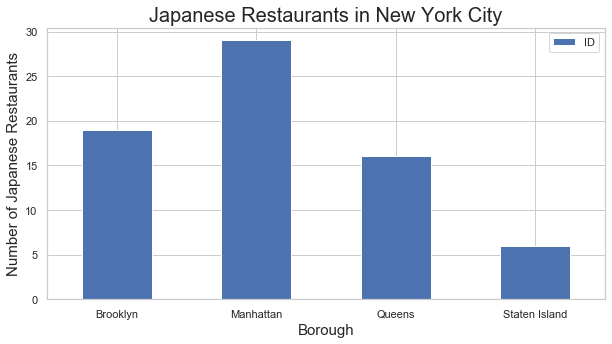

In [25]:
japanese_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5))
plt.title('Japanese Restaurants in New York City', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Top 10 Japanese restaurants in the neighborhood of New York City

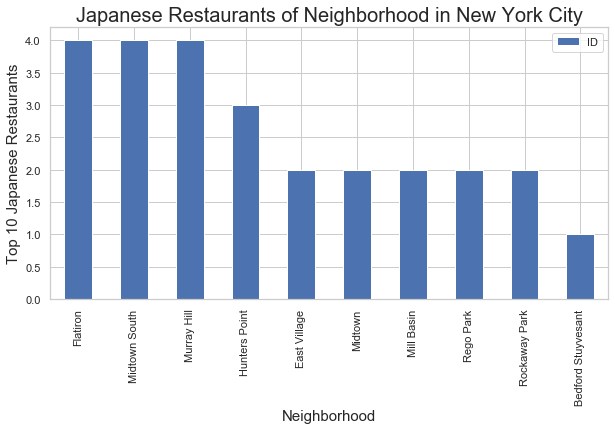

In [26]:
Top_ten = 10
japanese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(Top_ten).plot.bar(figsize=(10,5))
plt.title('Japanese Restaurants of Neighborhood in New York City', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Top 10 Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

Get venue details for rating

In [27]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [28]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in japanese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(japanese_rest_ny),')','processed')
    japanese_rest_stats_ny = japanese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
japanese_rest_stats_ny.head()

{'meta': {'code': 200, 'requestId': '5fe37af2732a472e703c9d09'}, 'response': {'venue': {'id': '4d5c12a01e43236a87eb1583', 'name': 'Sake Sushi', 'contact': {'phone': '7188515299', 'formattedPhone': '(718) 851-5299'}, 'location': {'address': '328 Church Ave', 'crossStreet': 'East 4th Street', 'lat': 40.644138, 'lng': -73.976439, 'labeledLatLngs': [{'label': 'display', 'lat': 40.644138, 'lng': -73.976439}], 'postalCode': '11218', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['328 Church Ave (East 4th Street)', 'Brooklyn, NY 11218', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sake-sushi/4d5c12a01e43236a87eb1583', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 49}, 'url': 'http

{'meta': {'code': 200, 'requestId': '5fe37af26ef73c60c6b1eafc'}, 'response': {'venue': {'id': '5cb5e5f9a35f4600255406c6', 'name': 'Maison Yaki', 'contact': {'phone': '7185522609', 'formattedPhone': '(718) 552-2609', 'twitter': 'maisonyaki', 'instagram': 'maisonyaki', 'facebook': '272996516936741', 'facebookUsername': 'maisonyaki', 'facebookName': 'Maison Yaki'}, 'location': {'address': '626 Vanderbilt Ave', 'crossStreet': 'Prospect Place', 'lat': 40.67747521328162, 'lng': -73.96908078141962, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67747521328162, 'lng': -73.96908078141962}], 'postalCode': '11238', 'cc': 'US', 'neighborhood': 'Prospect Heights', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['626 Vanderbilt Ave (Prospect Place)', 'Brooklyn, NY 11238', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/maison-yaki/5cb5e5f9a35f4600255406c6', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName

{'meta': {'code': 200, 'requestId': '5fe37af235102e558076fa01'}, 'response': {'venue': {'id': '51f9b7b3498eefe896caeb23', 'name': 'Shalom Japan', 'contact': {'phone': '7183884012', 'formattedPhone': '(718) 388-4012', 'twitter': 'shalomjapan'}, 'location': {'address': '310 S 4th St', 'crossStreet': 'at Rodney St', 'lat': 40.709219, 'lng': -73.955839, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709219, 'lng': -73.955839}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['310 S 4th St (at Rodney St)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shalom-japan/51f9b7b3498eefe896caeb23', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '52e81612bcbc57f1066b79fd', 'nam

{'meta': {'code': 200, 'requestId': '5fe37af2ee40976c11ad6b3a'}, 'response': {'venue': {'id': '5b3bcb69bfc6d0002ca9bf17', 'name': 'Warude', 'contact': {}, 'location': {'address': '387 Tompkins', 'lat': 40.684409678801586, 'lng': -73.94411847251774, 'labeledLatLngs': [{'label': 'display', 'lat': 40.684409678801586, 'lng': -73.94411847251774}], 'postalCode': '11216', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['387 Tompkins', 'New York, NY 11216', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/warude/5b3bcb69bfc6d0002ca9bf17', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss

{'meta': {'code': 200, 'requestId': '5fe37af3fb7e627cbe07586e'}, 'response': {'venue': {'id': '479ccb47f964a5206b4d1fe3', 'name': 'Iron Chef House', 'contact': {'phone': '7188588517', 'formattedPhone': '(718) 858-8517', 'facebook': '115805155108798', 'facebookUsername': 'IronChefHouse', 'facebookName': 'Iron Chef House'}, 'location': {'address': '92 Clark St', 'crossStreet': 'Henry St', 'lat': 40.697405738767394, 'lng': -73.99256031665585, 'labeledLatLngs': [{'label': 'display', 'lat': 40.697405738767394, 'lng': -73.99256031665585}, {'label': 'entrance', 'lat': 40.69726, 'lng': -73.992604}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['92 Clark St (Henry St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/iron-chef-house/479ccb47f964a5206b4d1fe3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName'

{'meta': {'code': 200, 'requestId': '5fe37af3afd2f83d5f328553'}, 'response': {'venue': {'id': '48a41073f964a52091511fe3', 'name': 'Hibino', 'contact': {'phone': '7182608052', 'formattedPhone': '(718) 260-8052', 'twitter': 'hibino_brooklyn', 'facebook': '301149720034179', 'facebookUsername': 'hibinobklyn', 'facebookName': 'Hibino Brooklyn'}, 'location': {'address': '333 Henry St', 'crossStreet': 'at Pacific St', 'lat': 40.69007601730789, 'lng': -73.99649744997076, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69007601730789, 'lng': -73.99649744997076}, {'label': 'entrance', 'lat': 40.690164, 'lng': -73.996383}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['333 Henry St (at Pacific St)', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hibino/48a41073f964a52091511fe3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Rest

{'meta': {'code': 200, 'requestId': '5fe37af4d547f51ffb84576a'}, 'response': {'venue': {'id': '5e4f270b03b7910008721f2e', 'name': 'Karazishi Botan', 'contact': {'phone': '3477631155', 'formattedPhone': '(347) 763-1155', 'instagram': 'karazishi_botan', 'facebook': '110365083873021', 'facebookUsername': 'KarazishiBotanBKLYN', 'facebookName': 'Karazishi Botan'}, 'location': {'address': '255 Smith St', 'crossStreet': 'Degraw St', 'lat': 40.683154, 'lng': -73.992888, 'labeledLatLngs': [{'label': 'display', 'lat': 40.683154, 'lng': -73.992888}], 'postalCode': '11231', 'cc': 'US', 'neighborhood': 'Boerum Hill', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['255 Smith St (Degraw St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/karazishi-botan/5e4f270b03b7910008721f2e', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon'

{'meta': {'code': 200, 'requestId': '5fe37af48ed5f550e5f161e6'}, 'response': {'venue': {'id': '5739c66c498e7ef6085cec4f', 'name': 'Karasu', 'contact': {'phone': '3472234811', 'formattedPhone': '(347) 223-4811'}, 'location': {'address': '166 Dekalb Ave', 'lat': 40.68957739999216, 'lng': -73.97329032514342, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68957739999216, 'lng': -73.97329032514342}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['166 Dekalb Ave', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/karasu/5739c66c498e7ef6085cec4f', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 35}, 'url': 'http://karasubk.com', 'price': {

{'meta': {'code': 200, 'requestId': '5fe37af4bec16445af9a303e'}, 'response': {'venue': {'id': '5276d39a498eb1a5d90096e4', 'name': 'Sushi Katsuei', 'contact': {'phone': '7187885338', 'formattedPhone': '(718) 788-5338', 'instagram': 'sushikatsuei', 'facebook': '566743240069984', 'facebookUsername': 'SushiKatsuei', 'facebookName': 'Sushi Katsuei'}, 'location': {'address': '210 7th Ave', 'crossStreet': 'at 3rd St', 'lat': 40.67061519402922, 'lng': -73.97850388946965, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67061519402922, 'lng': -73.97850388946965}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['210 7th Ave (at 3rd St)', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sushi-katsuei/5276d39a498eb1a5d90096e4', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'htt

{'meta': {'code': 200, 'requestId': '5fe37af5c94739757dd4bfc7'}, 'response': {'venue': {'id': '4e3cadcb1f6e844231dbe017', 'name': 'Waza', 'contact': {'phone': '7183999292', 'formattedPhone': '(718) 399-9292'}, 'location': {'address': '485 Myrtle Ave', 'lat': 40.693487522158414, 'lng': -73.965735666986, 'labeledLatLngs': [{'label': 'display', 'lat': 40.693487522158414, 'lng': -73.965735666986}, {'label': 'entrance', 'lat': 40.693575, 'lng': -73.965731}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['485 Myrtle Ave', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/waza/4e3cadcb1f6e844231dbe017', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'ti

{'meta': {'code': 200, 'requestId': '5fe37af576a2df29a0fa41f2'}, 'response': {'venue': {'id': '5946d138e2da1964625ca9b2', 'name': 'Daigo Hand Roll Bar', 'contact': {}, 'location': {'address': '445 Albee Sq W', 'lat': 40.69125894731662, 'lng': -73.98260299755893, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69125894731662, 'lng': -73.98260299755893}], 'postalCode': '11201', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['445 Albee Sq W', 'New York, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/daigo-hand-roll-bar/5946d138e2da1964625ca9b2', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'url': 'https://www.daigohandrollbar.com', 'price': {'tier': 2, 'messag

{'meta': {'code': 200, 'requestId': '5fe37af68ed5f550e5f167fc'}, 'response': {'venue': {'id': '58a202a25490d30f87553a08', 'name': 'Rice & Miso', 'contact': {'phone': '9292793488', 'formattedPhone': '(929) 279-3488', 'twitter': 'riceandmiso', 'instagram': 'riceandmisoeveryday'}, 'location': {'address': '134 Nevins St', 'lat': 40.68463349074915, 'lng': -73.9837684857605, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68463349074915, 'lng': -73.9837684857605}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['134 Nevins St', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/rice--miso/58a202a25490d30f87553a08', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 

{'meta': {'code': 200, 'requestId': '5fe37af6afd2f83d5f328e2c'}, 'response': {'venue': {'id': '4c7f0887fb74236a7727f9b9', 'name': 'Samurai Mama', 'contact': {'phone': '7185996161', 'formattedPhone': '(718) 599-6161'}, 'location': {'address': '205 Grand St', 'crossStreet': 'btwn Bedford & Driggs Ave', 'lat': 40.71411421938972, 'lng': -73.96019631848635, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71411421938972, 'lng': -73.96019631848635}, {'label': 'entrance', 'lat': 40.714135, 'lng': -73.960149}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['205 Grand St (btwn Bedford & Driggs Ave)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/samurai-mama/4c7f0887fb74236a7727f9b9', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/f

{'meta': {'code': 200, 'requestId': '5fe37af6e2c947606e60c542'}, 'response': {'venue': {'id': '51f9b7b3498eefe896caeb23', 'name': 'Shalom Japan', 'contact': {'phone': '7183884012', 'formattedPhone': '(718) 388-4012', 'twitter': 'shalomjapan'}, 'location': {'address': '310 S 4th St', 'crossStreet': 'at Rodney St', 'lat': 40.709219, 'lng': -73.955839, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709219, 'lng': -73.955839}], 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['310 S 4th St (at Rodney St)', 'Brooklyn, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shalom-japan/51f9b7b3498eefe896caeb23', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '52e81612bcbc57f1066b79fd', 'nam

{'meta': {'code': 200, 'requestId': '5fe37af7c8e80157c85e6349'}, 'response': {'venue': {'id': '4c2678eef1272d7f43a986c5', 'name': 'Fushimi', 'contact': {'phone': '7188337788', 'formattedPhone': '(718) 833-7788', 'twitter': 'fushimi_ny', 'facebook': '1885597118324660', 'facebookUsername': 'fushimibayridge', 'facebookName': 'Fushimi Japanese Cuisine & Lounge'}, 'location': {'address': '9316 4th Ave', 'crossStreet': 'btwn 93rd & 94th St', 'lat': 40.61727, 'lng': -74.03101, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61727, 'lng': -74.03101}, {'label': 'entrance', 'lat': 40.61725, 'lng': -74.030831}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9316 4th Ave (btwn 93rd & 94th St)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fushimi/4c2678eef1272d7f43a986c5', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restauran

{'meta': {'code': 200, 'requestId': '5fe37af7a58dfc2a7cb82a94'}, 'response': {'venue': {'id': '5a1e0dddb2958f1efac02a71', 'name': 'Shinka Ramen & Sake Bar', 'contact': {'phone': '2123438111', 'formattedPhone': '(212) 343-8111'}, 'location': {'address': '93 Bowery', 'lat': 40.71714667084875, 'lng': -73.99520581390026, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71714667084875, 'lng': -73.99520581390026}], 'postalCode': '10002', 'cc': 'US', 'neighborhood': 'Chinatown', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['93 Bowery', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/shinka-ramen--sake-bar/5a1e0dddb2958f1efac02a71', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipC

{'meta': {'code': 200, 'requestId': '5fe37af7c932c558be0c88cc'}, 'response': {'venue': {'id': '531a0207498e06b4656eb8c5', 'name': 'Geisha Japanese Cuisine', 'contact': {'phone': '2128627800', 'formattedPhone': '(212) 862-7800'}, 'location': {'address': '3468 Broadway', 'crossStreet': 'btw. W 141 and W 142', 'lat': 40.82435478003349, 'lng': -73.95199336185046, 'labeledLatLngs': [{'label': 'display', 'lat': 40.82435478003349, 'lng': -73.95199336185046}], 'postalCode': '10031', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3468 Broadway (btw. W 141 and W 142)', 'New York, NY 10031', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/geisha-japanese-cuisine/531a0207498e06b4656eb8c5', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '5fe37af8f849016e71286b90'}, 'response': {'venue': {'id': '542efa85498ea11026c9746c', 'name': 'Kappo Masa', 'contact': {'phone': '2129067141', 'formattedPhone': '(212) 906-7141'}, 'location': {'address': '976 Madison Ave', 'crossStreet': '76th Street', 'lat': 40.77452684529511, 'lng': -73.96346606906828, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77452684529511, 'lng': -73.96346606906828}, {'label': 'entrance', 'lat': 40.774636, 'lng': -73.963525}], 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['976 Madison Ave (76th Street)', 'New York, NY 10075', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kappo-masa/542efa85498ea11026c9746c', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': 

{'meta': {'code': 200, 'requestId': '5fe37af8bec16445af9a3e52'}, 'response': {'venue': {'id': '4bc11982b492d13ad88fa560', 'name': 'Inase Sushi', 'contact': {'phone': '2126281238', 'formattedPhone': '(212) 628-1238'}, 'location': {'address': '1586 1st Ave', 'crossStreet': '82nd St', 'lat': 40.77460731028703, 'lng': -73.95099236513252, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77460731028703, 'lng': -73.95099236513252}, {'label': 'entrance', 'lat': 40.774572, 'lng': -73.950849}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1586 1st Ave (82nd St)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/inase-sushi/4bc11982b492d13ad88fa560', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'pr

{'meta': {'code': 200, 'requestId': '5fe37af95c2c4d623ffe8fdd'}, 'response': {'venue': {'id': '5aa1d85d5f68b931b6f5acda', 'name': 'Kome Waza UES', 'contact': {'phone': '6468385928', 'formattedPhone': '(646) 838-5928'}, 'location': {'address': '1275 1st Ave', 'crossStreet': '69th St', 'lat': 40.765601636058776, 'lng': -73.95740334822048, 'labeledLatLngs': [{'label': 'display', 'lat': 40.765601636058776, 'lng': -73.95740334822048}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1275 1st Ave (69th St)', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kome-waza-ues/5aa1d85d5f68b931b6f5acda', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1bd941735', 'nam

{'meta': {'code': 200, 'requestId': '5fe37af9823a4a5812166f4f'}, 'response': {'venue': {'id': '48c50c4bf964a520dc511fe3', 'name': 'Café Zaiya', 'contact': {'phone': '2127790600', 'formattedPhone': '(212) 779-0600', 'twitter': 'cafezaiya'}, 'location': {'address': '18 E 41st St', 'crossStreet': 'btw 5th & Madison', 'lat': 40.752295, 'lng': -73.980433, 'labeledLatLngs': [{'label': 'display', 'lat': 40.752295, 'lng': -73.980433}], 'postalCode': '10017', 'cc': 'US', 'neighborhood': 'Midtown East', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['18 E 41st St (btw 5th & Madison)', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/caf%C3%A9-zaiya/48c50c4bf964a520dc511fe3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '5fe37af9671d1b6921c1fdcf'}, 'response': {'venue': {'id': '51fd77be498e883bf20fcca8', 'name': 'OOTOYA 大戸屋 (OOTOYA)', 'contact': {'phone': '2127040833', 'formattedPhone': '(212) 704-0833', 'twitter': 'ootoyany', 'facebook': '435716963171121', 'facebookUsername': 'Ootoyanyc', 'facebookName': 'OOTOYA NY'}, 'location': {'address': '141 W 41st St', 'crossStreet': 'btwn Broadway & 6th Ave', 'lat': 40.75497346338808, 'lng': -73.98610346565407, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75497346338808, 'lng': -73.98610346565407}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['141 W 41st St (btwn Broadway & 6th Ave)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ootoya-%E5%A4%A7%E6%88%B8%E5%B1%8B/51fd77be498e883bf20fcca8', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 's

{'meta': {'code': 200, 'requestId': '5fe37afa54b5505151bcb328'}, 'response': {'venue': {'id': '559cbaa6498eaa4e8d884811', 'name': 'Tempura Matsui', 'contact': {'phone': '2129868885', 'formattedPhone': '(212) 986-8885', 'twitter': 'tempuramatsui', 'facebook': '1412228069107274', 'facebookName': 'Tempura Matsui'}, 'location': {'address': '222 E 39th St', 'crossStreet': 'btwn Tunnel Exit St & 2nd Ave', 'lat': 40.7484611562686, 'lng': -73.97497442973443, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7484611562686, 'lng': -73.97497442973443}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['222 E 39th St (btwn Tunnel Exit St & 2nd Ave)', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tempura-matsui/559cbaa6498eaa4e8d884811', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'pref

{'meta': {'code': 200, 'requestId': '5fe37afae73c1a674a72ac5a'}, 'response': {'venue': {'id': '591caee89deb7d0f69be77a2', 'name': 'Omusubi Gonbei', 'contact': {'phone': '9174727168', 'formattedPhone': '(917) 472-7168'}, 'location': {'address': '370 Lexington Ave', 'crossStreet': '41st St', 'lat': 40.75092439033842, 'lng': -73.9769462752827, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75092439033842, 'lng': -73.9769462752827}], 'postalCode': '10017', 'cc': 'US', 'neighborhood': 'Midtown East', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['370 Lexington Ave (41st St)', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/omusubi-gonbei/591caee89deb7d0f69be77a2', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}]

{'meta': {'code': 200, 'requestId': '5fe37afb8ed5f550e5f17a6c'}, 'response': {'venue': {'id': '540dc46d498e86f0e5059dd2', 'name': 'Zuma New York', 'contact': {'phone': '2125449862', 'formattedPhone': '(212) 544-9862', 'facebook': '647684171911030', 'facebookUsername': 'zumanewyork', 'facebookName': 'Zuma'}, 'location': {'address': '261 Madison Ave', 'lat': 40.75052689410716, 'lng': -73.980782390213, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75052689410716, 'lng': -73.980782390213}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['261 Madison Ave', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/zuma-new-york/540dc46d498e86f0e5059dd2', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'pr

{'meta': {'code': 200, 'requestId': '5fe37afb54b5505151bcb70a'}, 'response': {'venue': {'id': '454f7cc4f964a520dc3c1fe3', 'name': 'Morimoto', 'contact': {'phone': '2129898883', 'formattedPhone': '(212) 989-8883', 'facebook': '193217760440', 'facebookUsername': 'morimotonyc', 'facebookName': 'Morimoto'}, 'location': {'address': '88 10th Ave', 'crossStreet': 'btwn W 15th & W 16th St', 'lat': 40.74272944262605, 'lng': -74.00643825531006, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74272944262605, 'lng': -74.00643825531006}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['88 10th Ave (btwn W 15th & W 16th St)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/morimoto/454f7cc4f964a520dc3c1fe3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '5fe37afb76cf540ef1c81b02'}, 'response': {'venue': {'id': '510c85e7e4b0056826b88297', 'name': 'Kura', 'contact': {'phone': '2122281010', 'formattedPhone': '(212) 228-1010'}, 'location': {'address': '130 Saint Marks Pl', 'crossStreet': 'btwn 1st Ave & Ave A', 'lat': 40.726802644699376, 'lng': -73.98344407523645, 'labeledLatLngs': [{'label': 'display', 'lat': 40.726802644699376, 'lng': -73.98344407523645}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['130 Saint Marks Pl (btwn 1st Ave & Ave A)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kura/510c85e7e4b0056826b88297', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48

{'meta': {'code': 200, 'requestId': '5fe37afbb1fef738c4208874'}, 'response': {'venue': {'id': '5b3805910dd31f002409405a', 'name': 'Suki Curry', 'contact': {'phone': '9179996672', 'formattedPhone': '(917) 999-6672', 'instagram': 'sukicurry'}, 'location': {'address': '86 E 7th St', 'crossStreet': '1st Ave', 'lat': 40.72715710327842, 'lng': -73.9861343187004, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72715710327842, 'lng': -73.9861343187004}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['86 E 7th St (1st Ave)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/suki-curry/5b3805910dd31f002409405a', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d14

{'meta': {'code': 200, 'requestId': '5fe37afc1a514c11a7c29081'}, 'response': {'venue': {'id': '535978ff498ec5450feaef85', 'name': 'Azasu', 'contact': {'phone': '2127777069', 'formattedPhone': '(212) 777-7069', 'twitter': 'azasunyc'}, 'location': {'address': '49 Clinton St', 'lat': 40.719627714039376, 'lng': -73.98480299175428, 'labeledLatLngs': [{'label': 'display', 'lat': 40.719627714039376, 'lng': -73.98480299175428}, {'label': 'entrance', 'lat': 40.719711, 'lng': -73.984846}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['49 Clinton St', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/azasu/535978ff498ec5450feaef85', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'veri

{'meta': {'code': 200, 'requestId': '5fe37afc2c123671c360bea1'}, 'response': {'venue': {'id': '5f375ed976cccc26893db65a', 'name': 'Kimika', 'contact': {'instagram': 'kimika.nyc'}, 'location': {'address': '40 Kenmare St', 'crossStreet': 'Eldridge St', 'lat': 40.720581, 'lng': -73.995314, 'labeledLatLngs': [{'label': 'display', 'lat': 40.720581, 'lng': -73.995314}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['40 Kenmare St (Eldridge St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kimika/5f375ed976cccc26893db65a', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortN

{'meta': {'code': 200, 'requestId': '5fe37afd35102e55807720ac'}, 'response': {'venue': {'id': '59c5657f3b4e0073c245f3c4', 'name': 'Sushi on Jones (West 10th)', 'contact': {'phone': '2122038253', 'formattedPhone': '(212) 203-8253', 'twitter': 'sushionjones'}, 'location': {'address': '210 W 10th St', 'crossStreet': 'Bleeker Street', 'lat': 40.734040354555205, 'lng': -74.00433095515368, 'labeledLatLngs': [{'label': 'display', 'lat': 40.734040354555205, 'lng': -74.00433095515368}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['210 W 10th St (Bleeker Street)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sushi-on-jones-west-10th/59c5657f3b4e0073c245f3c4', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix':

{'meta': {'code': 200, 'requestId': '5fe37afe823a4a5812167f6c'}, 'response': {'venue': {'id': '5d8bb403c918b1000849d6af', 'name': 'Chikarashi ISSO', 'contact': {'phone': '+6465968298', 'formattedPhone': '+64 6-596 8298', 'instagram': 'chikarashiisso'}, 'location': {'address': '38 Rector St', 'lat': 40.70835876464844, 'lng': -74.0145492553711, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70835876464844, 'lng': -74.0145492553711}], 'postalCode': '10006', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['38 Rector St', 'New York, NY 10006', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/chikarashi-isso/5d8bb403c918b1000849d6af', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3

{'meta': {'code': 200, 'requestId': '5fe37afeee40976c11ad94f4'}, 'response': {'venue': {'id': '573a1fd3498e17986070b4c5', 'name': 'Teriyaki Factory', 'contact': {'phone': '7188992429', 'formattedPhone': '(718) 899-2429', 'twitter': 'teriyakifactory'}, 'location': {'address': '83-12 37th Ave', 'crossStreet': '83rd & 84th', 'lat': 40.749546, 'lng': -73.882805, 'labeledLatLngs': [{'label': 'display', 'lat': 40.749546, 'lng': -73.882805}], 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['83-12 37th Ave (83rd & 84th)', 'Jackson Heights, NY 11372', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/teriyaki-factory/573a1fd3498e17986070b4c5', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified'

{'meta': {'code': 200, 'requestId': '5fe37afff26a27360064aa50'}, 'response': {'venue': {'id': '4ee7eaf7469064168cac36bf', 'name': 'Bamboo Ya', 'contact': {'phone': '7188061228', 'formattedPhone': '(718) 806-1228'}, 'location': {'address': '97-11 Queens Blvd', 'lat': 40.72981230326564, 'lng': -73.86081224868165, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72981230326564, 'lng': -73.86081224868165}], 'postalCode': '11374', 'cc': 'US', 'city': 'Rego Park', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['97-11 Queens Blvd', 'Rego Park, NY 11374', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bamboo-ya/4ee7eaf7469064168cac36bf', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 17}, 'url': 'http://bambooyasus

{'meta': {'code': 200, 'requestId': '5fe37affbec16445af9a565d'}, 'response': {'venue': {'id': '4c24df99f7ced13a4d8a236d', 'name': 'Sato Sushi', 'contact': {'phone': '7188971788', 'formattedPhone': '(718) 897-1788'}, 'location': {'address': '98-12 Queens Blvd', 'lat': 40.72809700543784, 'lng': -73.85789509296589, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72809700543784, 'lng': -73.85789509296589}], 'postalCode': '11374', 'cc': 'US', 'city': 'Rego Park', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['98-12 Queens Blvd', 'Rego Park, NY 11374', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sato-sushi/4c24df99f7ced13a4d8a236d', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3}, 'url': 'http://satocuisin

{'meta': {'code': 200, 'requestId': '5fe37b008549cf75f7831fa3'}, 'response': {'venue': {'id': '50f5979fe4b0ff6d3603e506', 'name': 'PP Boy Japan Teriyaki & Sushi', 'contact': {}, 'location': {'address': '90-22 161st St', 'lat': 40.70489618401879, 'lng': -73.7990307819717, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70489618401879, 'lng': -73.7990307819717}], 'postalCode': '11432', 'cc': 'US', 'city': 'Jamaica', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['90-22 161st St', 'Jamaica, NY 11432', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pp-boy-japan-teriyaki--sushi/50f5979fe4b0ff6d3603e506', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'url': 'http://ppboyjamaica.com', 'price': {'tier': 2, 'm

{'meta': {'code': 200, 'requestId': '5fe37b0154b5505151bccb57'}, 'response': {'venue': {'id': '4b9ae1e3f964a52030df35e3', 'name': 'Kawaii', 'contact': {'phone': '7188486888', 'formattedPhone': '(718) 848-6888'}, 'location': {'address': '82-19 153rd Ave', 'lat': 40.66646331832032, 'lng': -73.85173452198957, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66646331832032, 'lng': -73.85173452198957}], 'postalCode': '11414', 'cc': 'US', 'city': 'Howard Beach', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['82-19 153rd Ave', 'Howard Beach, NY 11414', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kawaii/4b9ae1e3f964a52030df35e3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 

{'meta': {'code': 200, 'requestId': '5fe37b01b4359f7d964b13e4'}, 'response': {'venue': {'id': '4c1868bb50389c74257fb3cf', 'name': "O'Sake Japanese Restaurant", 'contact': {'phone': '7189458888', 'formattedPhone': '(718) 945-8888', 'twitter': 'osakejapanese'}, 'location': {'address': '263 Beach 116th St', 'crossStreet': 'btw Newport Ave & Rockaway Beach Blvd', 'lat': 40.58112554862929, 'lng': -73.83797237571447, 'labeledLatLngs': [{'label': 'display', 'lat': 40.58112554862929, 'lng': -73.83797237571447}], 'postalCode': '11694', 'cc': 'US', 'city': 'Rockaway Park', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['263 Beach 116th St (btw Newport Ave & Rockaway Beach Blvd)', 'Rockaway Park, NY 11694', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/osake-japanese-restaurant/4c1868bb50389c74257fb3cf', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5fe37b022742ec1772a32e53'}, 'response': {'venue': {'id': '4bca626368f976b086615f83', 'name': 'Kyoto Sushi 5', 'contact': {'phone': '7187276666', 'formattedPhone': '(718) 727-6666', 'twitter': 'kyotosushi5'}, 'location': {'address': '418 Forest Ave', 'crossStreet': 'Walbrooke Ave', 'lat': 40.63082355885339, 'lng': -74.10328887644148, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63082355885339, 'lng': -74.10328887644148}, {'label': 'entrance', 'lat': 40.630759, 'lng': -74.10329}], 'postalCode': '10301', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['418 Forest Ave (Walbrooke Ave)', 'Staten Island, NY 10301', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/kyoto-sushi-5/4bca626368f976b086615f83', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '5fe37b02d358eb7aca882a61'}, 'response': {'venue': {'id': '4b747a21f964a520e6de2de3', 'name': 'Arirang Hibachi Steakhouse', 'contact': {'phone': '7189669600', 'formattedPhone': '(718) 966-9600'}, 'location': {'address': '23 Nelson Ave', 'crossStreet': 'at Locust Pl', 'lat': 40.5495386071544, 'lng': -74.15012268209598, 'labeledLatLngs': [{'label': 'display', 'lat': 40.5495386071544, 'lng': -74.15012268209598}], 'postalCode': '10308', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['23 Nelson Ave (at Locust Pl)', 'Staten Island, NY 10308', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arirang-hibachi-steakhouse/4b747a21f964a520e6de2de3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': Tr

{'meta': {'code': 200, 'requestId': '5fe37b02823a4a5812168f29'}, 'response': {'venue': {'id': '4b9863e0f964a520a83f35e3', 'name': 'Tomo', 'contact': {'phone': '7182275100', 'formattedPhone': '(718) 227-5100'}, 'location': {'address': '4561 Amboy Rd', 'lat': 40.54301071166992, 'lng': -74.16570281982422, 'labeledLatLngs': [{'label': 'display', 'lat': 40.54301071166992, 'lng': -74.16570281982422}], 'postalCode': '10312', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4561 Amboy Rd', 'Staten Island, NY 10312', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tomo/4b9863e0f964a520a83f35e3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 'Sushi

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5fe37b03a58dfc2a7cb8549b'}, 'response': {}}


KeyError: 'venue'

The data has 50 Japanese restaurants

In [29]:
# Save the data in csv file
japanese_rest_stats_ny.to_csv('japanese_rest_stats_ny.csv')
japanese_rest_stats_ny.shape

(50, 7)

In [30]:
japanese_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Brooklyn,Kensington,4d5c12a01e43236a87eb1583,Sake Sushi,31,7.5,49
1,Brooklyn,Prospect Heights,5cb5e5f9a35f4600255406c6,Maison Yaki,82,8.3,23
2,Brooklyn,Williamsburg,51f9b7b3498eefe896caeb23,Shalom Japan,298,8.1,99
3,Brooklyn,Bedford Stuyvesant,5b3bcb69bfc6d0002ca9bf17,Warude,30,8.3,6
4,Brooklyn,Brooklyn Heights,479ccb47f964a5206b4d1fe3,Iron Chef House,142,8.1,66


The statistics says average 7.39, max 9.2 in rating for 50 Japanese restaurants

In [32]:
japanese_rest_stats_ny.describe()

,Rating
count,50.000000
mean,7.390000
std,2.304322
min,0.000000
25%,7.525000
50%,8.050000
75%,8.575000
max,9.200000


In [33]:
japanese_rest_stats_ny.iloc[japanese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                East Village
ID              510c85e7e4b0056826b88297
Name                                Kura
Likes                                214
Rating                               9.2
Tips                                  63
Name: 26, dtype: object

Display average rating by borough

In [36]:
ny_borough_stats=japanese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Brooklyn,8.260000
1,Manhattan,8.236842
3,Staten Island,5.760000
2,Queens,5.481818


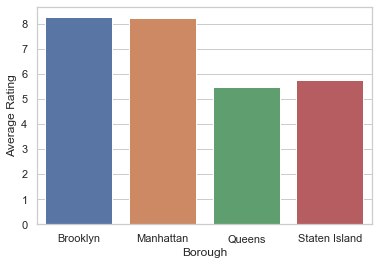

In [37]:
sns.barplot(x = 'Borough',
            y = 'Average Rating',
            data = ny_borough_stats)
sns.set(style="whitegrid", font_scale=1.0)
plt.show()

In [38]:
ny_neighborhood_stats=japanese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
10,East Village,9.2
8,Cobble Hill,9.1
5,Chelsea,8.9
13,Fort Greene,8.8
31,Park Slope,8.8
1,Boerum Hill,8.8
35,Soho,8.8
30,North Side,8.8
24,Lindenwood,8.7
9,Downtown,8.7


Extract Japanese restaurants average rating above 7.0

In [39]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Bedford Stuyvesant,8.30
1,Boerum Hill,8.80
2,Brooklyn Heights,8.10
3,Carroll Gardens,7.60
5,Chelsea,8.90
6,Chinatown,7.60
7,Clinton Hill,7.00
8,Cobble Hill,9.10
9,Downtown,8.70
10,East Village,9.20


Join neighborhood rating data with Longitude and latitude

In [40]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,8.30
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.80
2,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.10
3,Brooklyn,Carroll Gardens,40.680540,-73.994654,7.60
4,Manhattan,Chelsea,40.744035,-74.003116,8.90
5,Staten Island,Chelsea,40.594726,-74.189560,8.90
6,Manhattan,Chinatown,40.715618,-73.994279,7.60
7,Brooklyn,Clinton Hill,40.693229,-73.967843,7.00
8,Brooklyn,Cobble Hill,40.687920,-73.998561,9.10
9,Brooklyn,Downtown,40.690844,-73.983463,8.70


Display number of high rating Japanese restraurants by borough

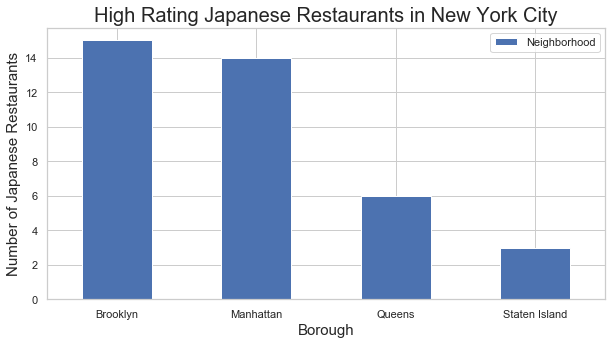

In [42]:
ny_neighborhood_stats.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5))
plt.title('High Rating Japanese Restaurants in New York City', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

Get geological location of nighborhood in New York city 

In [47]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Prepare for Cluster Analysis

In [48]:
x = ny_neighborhood_stats.iloc[:,2:4]
x

,Latitude,Longitude
0,40.687232,-73.941785
1,40.685683,-73.983748
2,40.695864,-73.993782
3,40.680540,-73.994654
4,40.744035,-74.003116
5,40.594726,-74.189560
6,40.715618,-73.994279
7,40.693229,-73.967843
8,40.687920,-73.998561
9,40.690844,-73.983463


KMeans Cluster for high rating neighborhoods in New York City

In [49]:
# Import KMeans Library
from sklearn.cluster import KMeans
kmeans = KMeans (4)
kmeans.fit (x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
identified_clusters = kmeans.fit_predict (x)
identified_clusters

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 0, 3, 1, 0,
       1, 0, 3, 3, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 3])

In [51]:
data_with_clusters = ny_neighborhood_stats.copy()
data_with_clusters['Cluster'] =  identified_clusters
data_with_clusters

,Borough,Neighborhood,Latitude,Longitude,Average Rating,Cluster
0,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,8.30,0
1,Brooklyn,Boerum Hill,40.685683,-73.983748,8.80,0
2,Brooklyn,Brooklyn Heights,40.695864,-73.993782,8.10,0
3,Brooklyn,Carroll Gardens,40.680540,-73.994654,7.60,0
4,Manhattan,Chelsea,40.744035,-74.003116,8.90,0
5,Staten Island,Chelsea,40.594726,-74.189560,8.90,2
6,Manhattan,Chinatown,40.715618,-73.994279,7.60,0
7,Brooklyn,Clinton Hill,40.693229,-73.967843,7.00,0
8,Brooklyn,Cobble Hill,40.687920,-73.998561,9.10,0
9,Brooklyn,Downtown,40.690844,-73.983463,8.70,0


Display scatter plot in color by high rating Japanese restaurant neighborhood

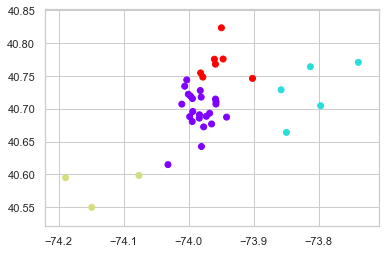

In [52]:
import matplotlib.pyplot as plt

x = data_with_clusters['Longitude']
y = data_with_clusters['Latitude']

plt.scatter(x, y, c=data_with_clusters['Cluster'], cmap='rainbow')
plt.show()

Create map with the cluster of high rating Japanese restaurants of neighborhood in New York city

In [53]:
# Create clustering neighborhoods map in Tronto
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_with_clusters['Latitude'], data_with_clusters['Longitude'], data_with_clusters['Neighborhood'], data_with_clusters['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters